In [4]:
import numpy as np
import pandas as pd
from data_preprocessing import KMeansDimensionalityReduction
from sklearn.ensemble import RandomForestClassifier
import model_evaluator
import data_import
import sklearn.metrics as metrics

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [6]:
# Import data
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test("Contagio")

In [55]:
df_ben = df_tot[df_tot['malware'] == False]
df_mal = df_tot[df_tot['malware'] == True]

ben = np.array(df_ben.sum())
mal = np.array(df_mal.sum())

#print(ben)
#print(mal)

diff = np.abs(ben - mal)
summ = np.abs(ben + mal)
#print(summ)
#print(summ)

rate = np.array(diff / summ)
#print(rate)

df_rate_uns = pd.Series(rate, index=list(df_tot.columns)).drop("malware")
print(df_rate_uns)
print("------------------")
df_rate = df_rate_uns.sort_values(ascending=False)
df_rate_rev = df_rate_uns.sort_values()
print(df_rate)

obj              0.741606
endobj           0.742549
stream           0.767761
endstream        0.768453
xref             0.188899
trailer          0.133669
startxref        0.288893
/Page            0.594955
/Encrypt         0.480315
/ObjStm          0.971428
/JS              0.758707
/JavaScript      0.773956
/AA              0.830323
/OpenAction      0.848678
/AcroForm        0.357867
/JBIG2Decode     0.969095
/RichMedia       1.000000
/Launch          0.108434
/EmbeddedFile    0.160116
/XFA             0.988604
/Colors          1.000000
dtype: float64
------------------
/Colors          1.000000
/RichMedia       1.000000
/XFA             0.988604
/ObjStm          0.971428
/JBIG2Decode     0.969095
/OpenAction      0.848678
/AA              0.830323
/JavaScript      0.773956
endstream        0.768453
stream           0.767761
/JS              0.758707
endobj           0.742549
obj              0.741606
/Page            0.594955
/Encrypt         0.480315
/AcroForm        0.357867
star

In [50]:
for i in range(1, 22):
    columns = list(df_rate[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print("-------------------------------------")

i = 1
0.7090612951738317
0.0
-------------------------------------
i = 2
0.7090612951738317
0.0
-------------------------------------
i = 3
0.7090612951738317
0.0
-------------------------------------
i = 4
0.7812875549070069
14.6
-------------------------------------
i = 5
0.784139272975396
15.8
-------------------------------------
i = 6
0.8890295581740488
349.2
-------------------------------------
i = 7
0.8899989980404481
342.0
-------------------------------------
i = 8
0.9909422892641929
20.8
-------------------------------------
i = 9
0.9949953237045026
13.2
-------------------------------------
i = 10
0.9957619951735136
11.2
-------------------------------------
i = 11
0.996171574760672
8.6
-------------------------------------
i = 12
0.9957881794112987
5.0
-------------------------------------
i = 13
0.9957873204324604
5.0
-------------------------------------
i = 14
0.9956568877574543
4.0
-------------------------------------
i = 15
0.9950203700068728
7.4
--------------------

In [51]:
for i in range(1, 22):
    columns = list(df_rate_uns[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print("-------------------------------------")

i = 1
0.9532347830074045
154.2
-------------------------------------
i = 2
0.9546814482576819
148.2
-------------------------------------
i = 3
0.9777818345404065
60.8
-------------------------------------
i = 4
0.9776882895168926
61.2
-------------------------------------
i = 5
0.9862587626628535
27.6
-------------------------------------
i = 6
0.9864841694448891
27.6
-------------------------------------
i = 7
0.9872655413885484
23.8
-------------------------------------
i = 8
0.9869471217824218
25.4
-------------------------------------
i = 9
0.9865510588965816
25.2
-------------------------------------
i = 10
0.9868208735321267
23.4
-------------------------------------
i = 11
0.9943887168557761
9.6
-------------------------------------
i = 12
0.9952872850929919
7.8
-------------------------------------
i = 13
0.9947979849879746
7.8
-------------------------------------
i = 14
0.9949768686552763
7.2
-------------------------------------
i = 15
0.9951994469291693
7.0
---------------

In [52]:
for i in range(1, 22):
    columns = list(df_rate_rev[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print("-------------------------------------")

i = 1
0.7091292505313567
0.0
-------------------------------------
i = 2
0.925433931657663
41.8
-------------------------------------
i = 3
0.9254916250956112
41.2
-------------------------------------
i = 4
0.9254916250956112
41.2
-------------------------------------
i = 5
0.9300301868243104
20.0
-------------------------------------
i = 6
0.9300201808674284
19.0
-------------------------------------
i = 7
0.9294882388544268
22.2
-------------------------------------
i = 8
0.9387291341772144
53.4
-------------------------------------
i = 9
0.9860092244335188
30.2
-------------------------------------
i = 10
0.9860159568956399
29.4
-------------------------------------
i = 11
0.9962128843264747
10.0
-------------------------------------
i = 12
0.994835940628384
9.2
-------------------------------------
i = 13
0.9947908302839314
9.2
-------------------------------------
i = 14
0.9950146387687429
9.0
-------------------------------------
i = 15
0.9950622625012493
8.4
-------------------

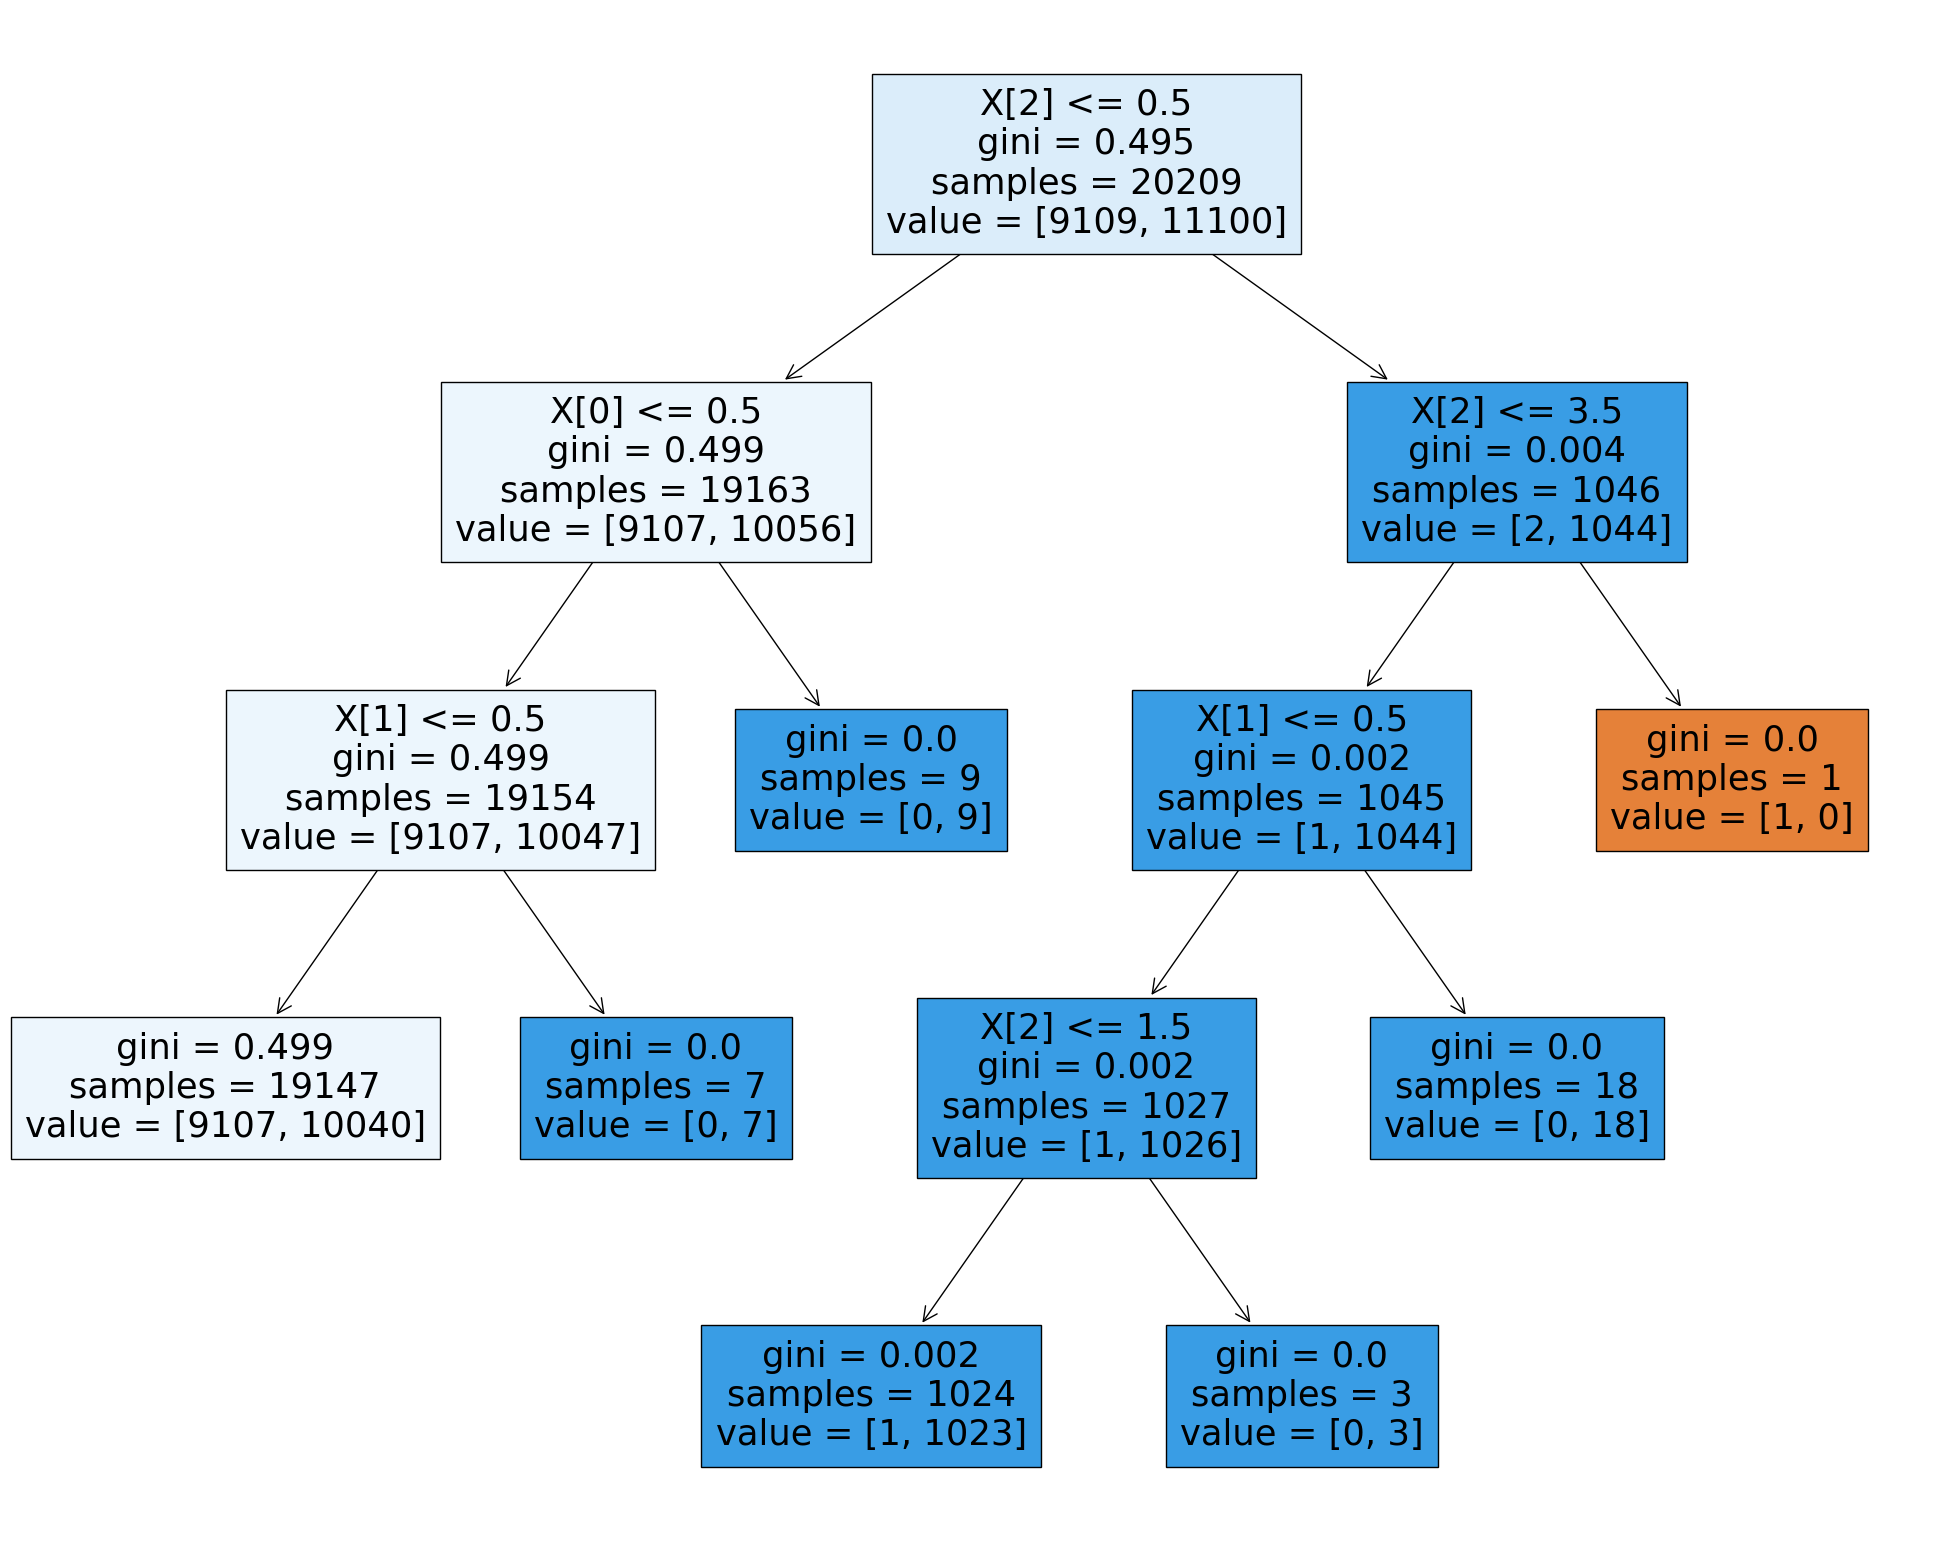

In [61]:
columns = list(df_rate[:3].index)
y_train_cust = np.array(df_tot["malware"])
X_train_cust = np.array(df_tot[columns])

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_cust, y_train_cust)

#text_representation = tree.export_text(clf)
#print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True)
plt.show()

In [16]:
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test('Contagio')
KMDimRed = KMeansDimensionalityReduction(df_tot)
df_tot_km, X_tot_km, X_train_km = KMDimRed.fit_ben_mal_kmeans(df_tot, X_tot, X_train)
X_test_km = KMDimRed.transform_ben_mal_kmeans(X_test)

In [17]:
# kernel to be set linear as it is binary class
classifier = RandomForestClassifier(n_estimators = 200, random_state=0)

# traininf the model
#classifier.fit(X_train, y_train)
kfold_scores_npv = model_evaluator.kfold_cross_validation(classifier, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9981971506973581
4.0


In [46]:
# kernel to be set linear as it is binary class
classifier = RandomForestClassifier(n_estimators = 200, random_state=0)

# traininf the model
#classifier.fit(X_train, y_train)
kfold_scores_npv = model_evaluator.kfold_cross_validation(classifier, X_train_km, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9971815415730134
6.6


Without Kfold is better

In [33]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9973549146821374
3.8


In [44]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_km, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9961705349653489
7.0


In general Random Forest is better than single Decision Tree

|--- /JS <= 0.50
|   |--- /XFA <= 0.50
|   |   |--- startxref <= 0.50
|   |   |   |--- class: True
|   |   |--- startxref >  0.50
|   |   |   |--- /Launch <= 0.50
|   |   |   |   |--- /JavaScript <= 0.50
|   |   |   |   |   |--- /Colors <= 0.50
|   |   |   |   |   |   |--- /AA <= 0.50
|   |   |   |   |   |   |   |--- /EmbeddedFile <= 8.50
|   |   |   |   |   |   |   |   |--- xref <= 0.50
|   |   |   |   |   |   |   |   |   |--- obj <= 20.50
|   |   |   |   |   |   |   |   |   |   |--- /Encrypt <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- /Encrypt >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |--- obj >  20.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- xref >  0.50
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- /EmbeddedFile >  8.50
|   |   |   |   |   | 

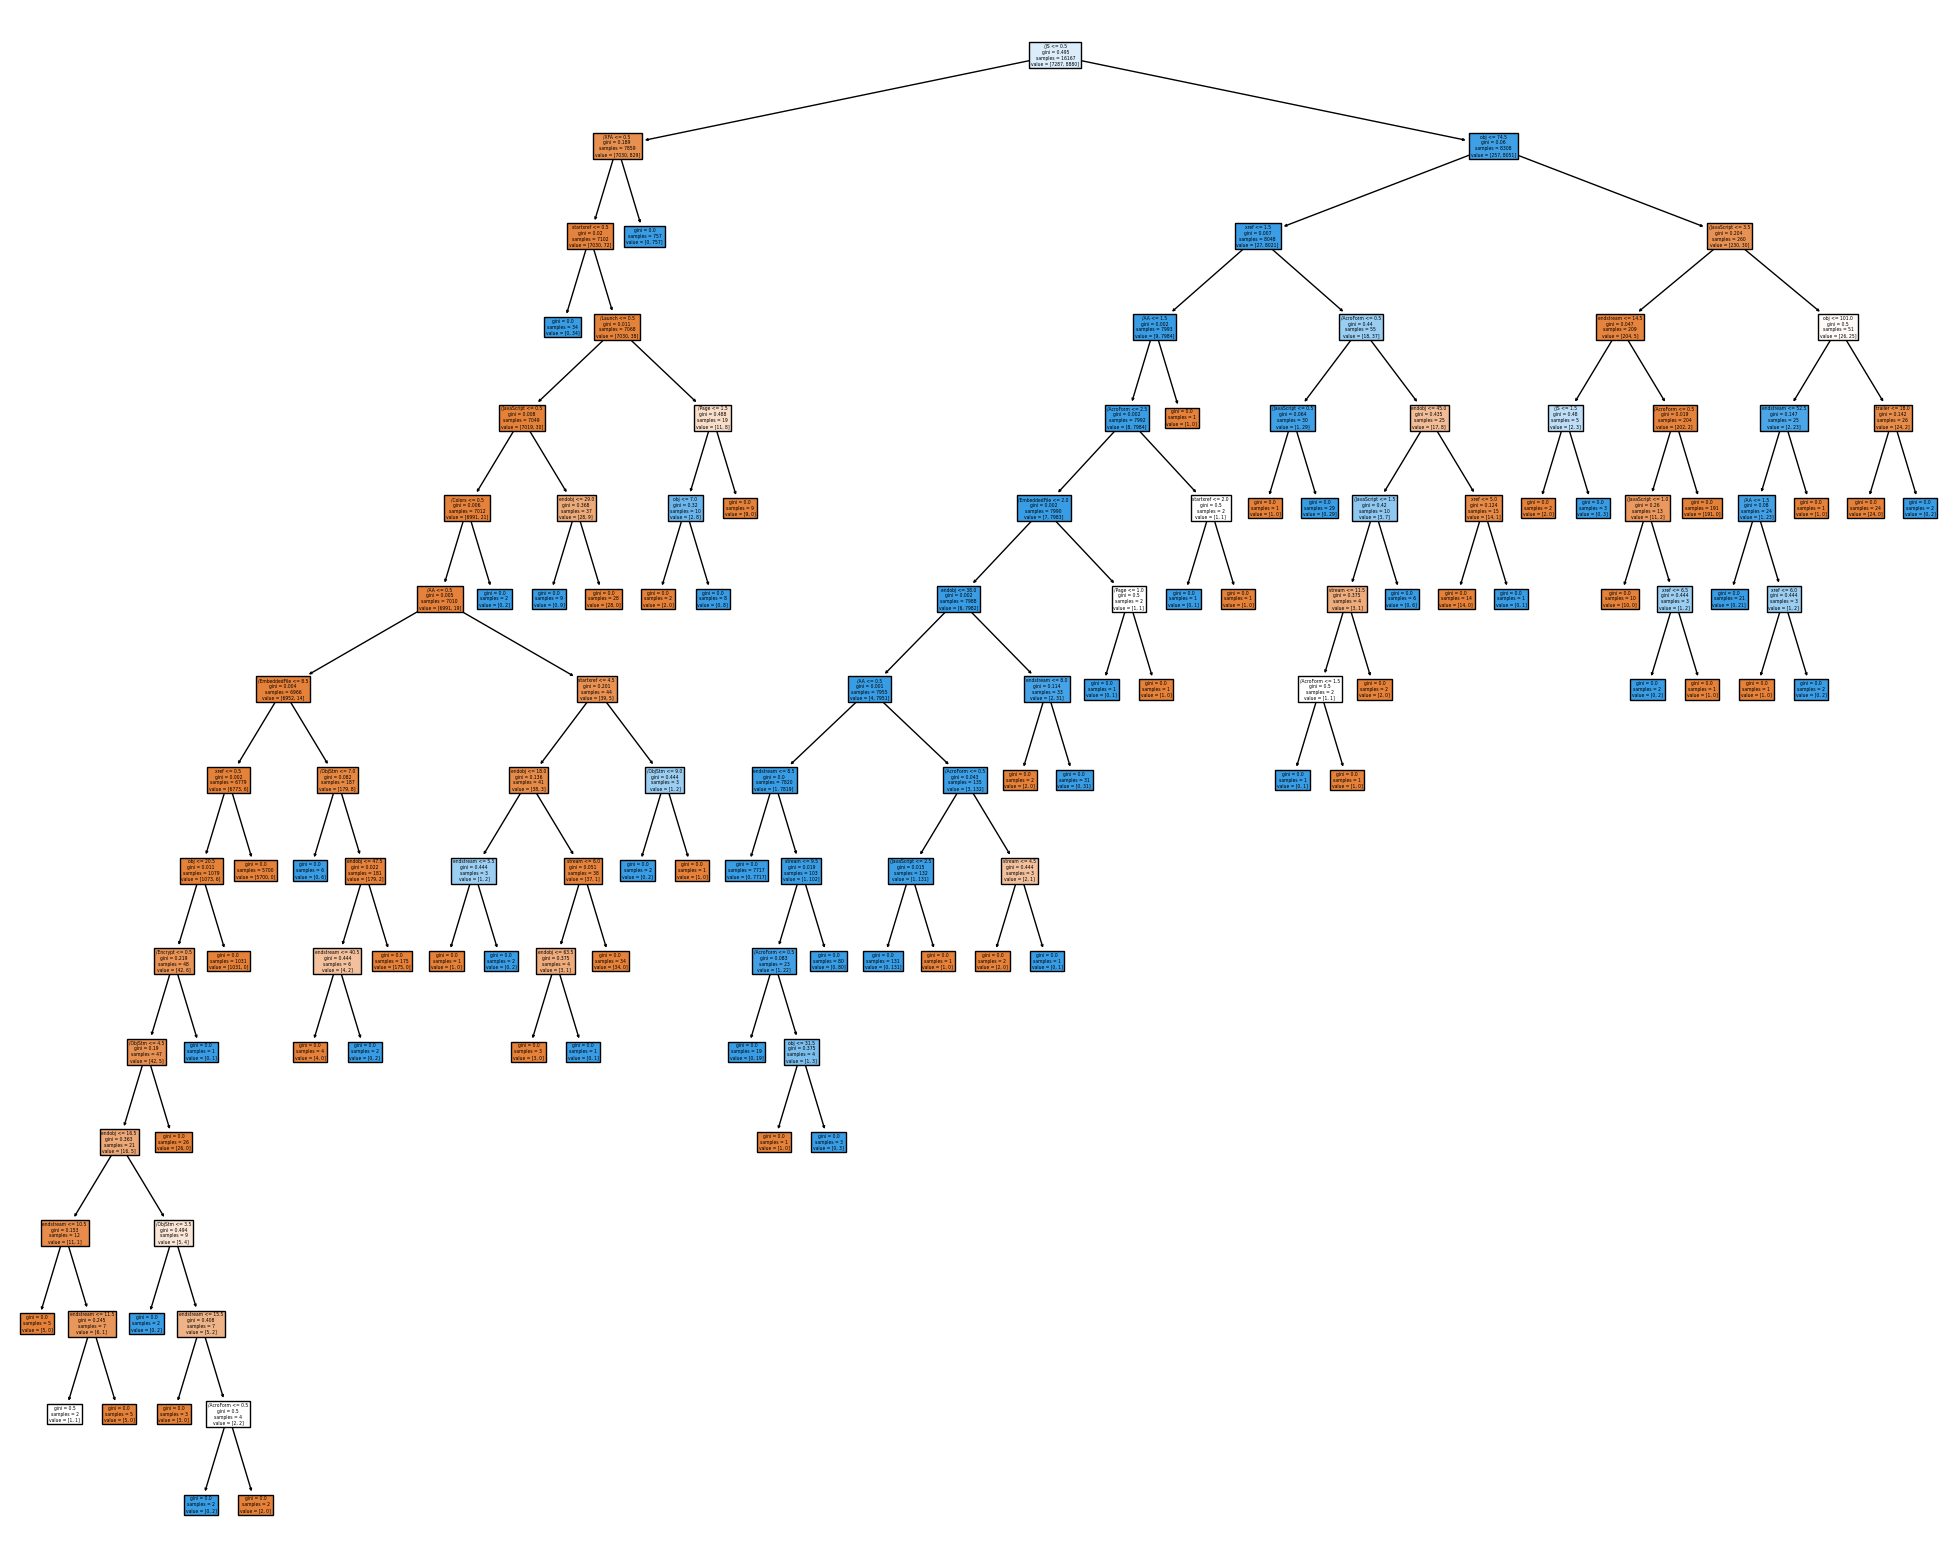

In [22]:
#clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
#kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)

text_representation = tree.export_text(clf, feature_names=list(df_tot.columns)[:-1])
print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=list(df_tot.columns)[:-1], filled=True)
plt.show()
fig.savefig("decistion_tree.png")